In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

pd.set_option('display.max_columns', 30)
dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=[dataset.feature_names])
y = pd.Series(dataset.target)

In [2]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=9)

modelo = LogisticRegression(C=80, penalty='l1', solver='liblinear', random_state=9, max_iter=10000)
modelo.fit(X_treino, y_treino)

resultado = modelo.score(X_teste, y_teste)
print("Acurácia: ", resultado)

Acurácia:  0.9707602339181286


In [12]:
predicoes = modelo.predict_proba(X_teste)

In [13]:
predicoes

array([[8.13377323e-01, 1.86622677e-01],
       [1.51558031e-01, 8.48441969e-01],
       [1.00000000e+00, 9.45436563e-15],
       [1.01960816e-01, 8.98039184e-01],
       [2.86003510e-05, 9.99971400e-01],
       [1.00000000e+00, 7.70558441e-21],
       [1.00000000e+00, 3.65013652e-15],
       [1.00000000e+00, 6.01352671e-12],
       [5.93065005e-06, 9.99994069e-01],
       [9.99999992e-01, 8.34520533e-09],
       [1.00000000e+00, 4.98556152e-14],
       [6.59271065e-05, 9.99934073e-01],
       [3.67298548e-06, 9.99996327e-01],
       [4.82371178e-05, 9.99951763e-01],
       [9.99999813e-01, 1.86523154e-07],
       [2.17503688e-02, 9.78249631e-01],
       [4.04799661e-06, 9.99995952e-01],
       [3.74902096e-02, 9.62509790e-01],
       [1.45560082e-06, 9.99998544e-01],
       [4.38752179e-07, 9.99999561e-01],
       [1.00000000e+00, 1.51803212e-35],
       [4.74828421e-07, 9.99999525e-01],
       [1.13716165e-03, 9.98862838e-01],
       [1.00000000e+00, 1.51886469e-10],
       [1.918344

In [14]:
probs = predicoes[:, 1]

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tresholds = roc_curve(y_teste, probs)

In [16]:
print("fpr: ", fpr)
print("tpr: ", tpr)
print("tresholds: ", tresholds)

fpr:  [0.         0.         0.         0.03225806 0.03225806 0.11290323
 0.11290323 1.        ]
tpr:  [0.         0.00917431 0.95412844 0.95412844 0.99082569 0.99082569
 1.         1.        ]
tresholds:  [2.00000000e+00 9.99999995e-01 8.80436829e-01 8.48441969e-01
 6.05392216e-01 1.56860266e-01 1.37285008e-01 2.08989250e-47]


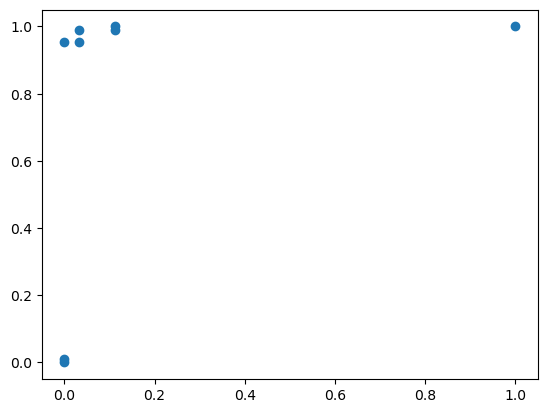

In [17]:
import matplotlib.pyplot as plt

plt.scatter(fpr, tpr)
plt.show()

In [18]:
print(roc_auc_score(y_teste, probs))

0.9977804084048535
